In [ ]:
# 1.
import pandas as pd


url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [ ]:
#2

missing_features = df.columns[df.isnull().any()].tolist()

print("Features with missing values:", missing_features)



Features with missing values: ['Age', 'Cabin', 'Embarked']


In [ ]:
#3

df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

print(df[['Age', 'Cabin']].isnull().sum())


Age      0
Cabin    0
dtype: int64


<ipython-input-15-a8c278714694>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-15-a8c278714694>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

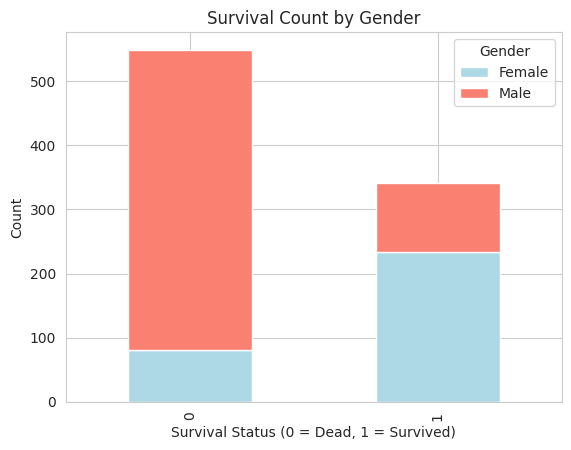

In [ ]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

survival_counts = df.groupby(['Survived', 'Sex']).size().unstack()
survival_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.xlabel("Survival Status (0 = Dead, 1 = Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title="Gender", labels=["Female", "Male"])

plt.show()



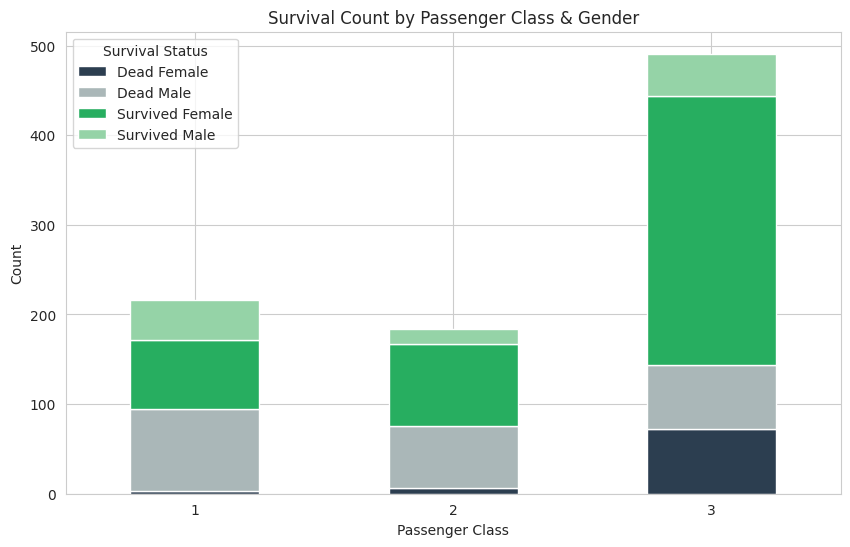

In [ ]:
# 5
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
survival_pclass_counts = df.groupby(['Pclass', 'Survived', 'Sex']).size().unstack()

ax = survival_pclass_counts.unstack(level=1).plot(kind='bar', stacked=True,
                                                 color=['#2c3e50', '#aab7b8', '#27ae60', '#95d3a7'], figsize=(10, 6))

plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class & Gender")
plt.legend(title="Survival Status", labels=["Dead Female", "Dead Male", "Survived Female", "Survived Male"])
plt.xticks(rotation=0)
plt.show()





In [ ]:
# 6

def assign_age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(assign_age_class)

print(df[['Age', 'AgeClass']].head())



    Age  AgeClass
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2


In [ ]:
# 7
df.drop('Age', axis=1, inplace=True)

print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  
4            373450

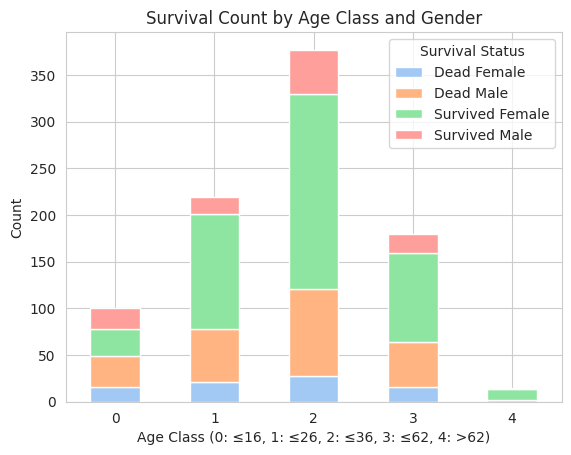

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ageclass_survival_counts = df.groupby(['AgeClass', 'Survived', 'Sex']).size().unstack()
ageclass_survival_counts = ageclass_survival_counts.unstack(level=1)
ax = ageclass_survival_counts.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))

plt.xlabel("Age Class (0: ≤16, 1: ≤26, 2: ≤36, 3: ≤62, 4: >62)")
plt.ylabel("Count")
plt.title("Survival Count by Age Class and Gender")
plt.legend(title="Survival Status", labels=["Dead Female", "Dead Male", "Survived Female", "Survived Male"])
plt.xticks(rotation=0)

plt.show()
